In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn.csv')


In [12]:
data.head(10)

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198
5,10846,Male,20,Married,2,Monthly,DSL,No,Yes,No,...,No,Yes,Yes,Yes,9.44,4.48,No,819,-54.267972,159.342125
6,12253,Female,24,Single,0,Monthly,Fiber Optic,No,Yes,No,...,Yes,Yes,Yes,Yes,35.63,200.36,No,75,2.978017,-38.257967
7,13639,Male,19,Single,0,Yearly,DSL,Yes,Yes,No,...,No,Yes,No,No,46.88,980.79,No,653,-48.440095,7.414829
8,14262,Female,32,Single,1,Monthly,DSL,No,Yes,Yes,...,No,Yes,No,Yes,56.13,723.39,No,594,32.197749,146.644439
9,20573,Male,41,Single,1,Yearly,Fiber Optic,No,No,No,...,Yes,No,No,No,98.33,95.05,No,409,-66.727147,44.453225


In [13]:
data.shape

(500, 21)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [17]:
# Split the data into features (X) and target variable(y)
X= data.drop('churn_status',axis=1)
y= data['churn_status']

In [18]:
data.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


In [19]:
# Encode categorical data vaiables
label_encoder= LabelEncoder()
X_encoded= X.apply(label_encoder.fit_transform)

In [21]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_encoded,y,test_size=0.05, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)

(475, 20)
(25, 20)


# Decision Tree Algorithm Implementation


In [22]:
#Initialize the model
model= DecisionTreeClassifier()

In [23]:
#Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
#Make predictions on the test set
y_pred= model.predict(X_test)

In [25]:
# Evaluate the model
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [28]:
#Import Tree Classifier model
from sklearn import tree

data1 = tree.DecisionTreeClassifier() #creating decision tree object 1 with default parameters
#Train the model using the training sets
data1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = data1.predict(X_test)

# data leakage

In [29]:
data2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
data2.fit(X_train, y_train)
y_pred2 = data2.predict(X_test)

In [30]:
data3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf=2)
data3.fit(X_train, y_train)
y_pred3 = data3.predict(X_test)

In [31]:
#import scikit learn metrics to calculate accuracy
from sklearn import metrics
print ('Accuracy M1:',metrics.accuracy_score(y_test,y_pred1))
print ('Accuracy M2:',metrics.accuracy_score(y_test,y_pred2))
print ('Accuracy M3:',metrics.accuracy_score(y_test,y_pred3))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred)) # recall means how much % of your data is correctly depicted by our model

Accuracy M1: 0.84
Accuracy M2: 0.88
Accuracy M3: 0.88


In [33]:
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {"max_depth": [2,3,4,5],
              "max_features": [1, 3,5, 10],
              "min_samples_split": [2, 3,5, 10],
              "criterion": ["gini","entropy"], "min_samples_leaf":[1,2,3,4]}

# run grid search
grid_search = GridSearchCV(data1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [34]:
data4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=3,min_samples_split=3,min_samples_leaf =1)

data4.fit(X_train, y_train)

y_pred4 = data4.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(y_test,y_pred4))

Accuracy: 0.8


In [35]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix",confusion_matrix(y_test,y_pred4))

confusion_matrix [[20  2]
 [ 3  0]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))
#precision 1 class TP/TP+FP, 0 class TN/TN+FN
# recall TP/TP+FN TN/TN+FP
#We can see that we are able to predict with 80 % accurecy will the person stay in the company or leave.

              precision    recall  f1-score   support

          No       0.87      0.91      0.89        22
         Yes       0.00      0.00      0.00         3

    accuracy                           0.80        25
   macro avg       0.43      0.45      0.44        25
weighted avg       0.77      0.80      0.78        25



In [37]:
#feature importance for model 3
data3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.26265112, 0.        , 0.        , 0.48577996, 0.25156892])

In [38]:
print(dict(zip(X_train.columns, data3.feature_importances_)))

{'customer_id': 0.0, 'gender': 0.0, 'age': 0.0, 'marital_status': 0.0, 'dependents': 0.0, 'contract_type': 0.0, 'internet_service': 0.0, 'phone_service': 0.0, 'multiple_lines': 0.0, 'online_security': 0.0, 'online_backup': 0.0, 'device_protection': 0.0, 'tech_support': 0.0, 'streaming_tv': 0.0, 'streaming_movies': 0.0, 'monthly_charges': 0.2626511184569204, 'total_charges': 0.0, 'call_duration_minutes': 0.0, 'latitude': 0.48577996039748045, 'longitude': 0.25156892114559926}


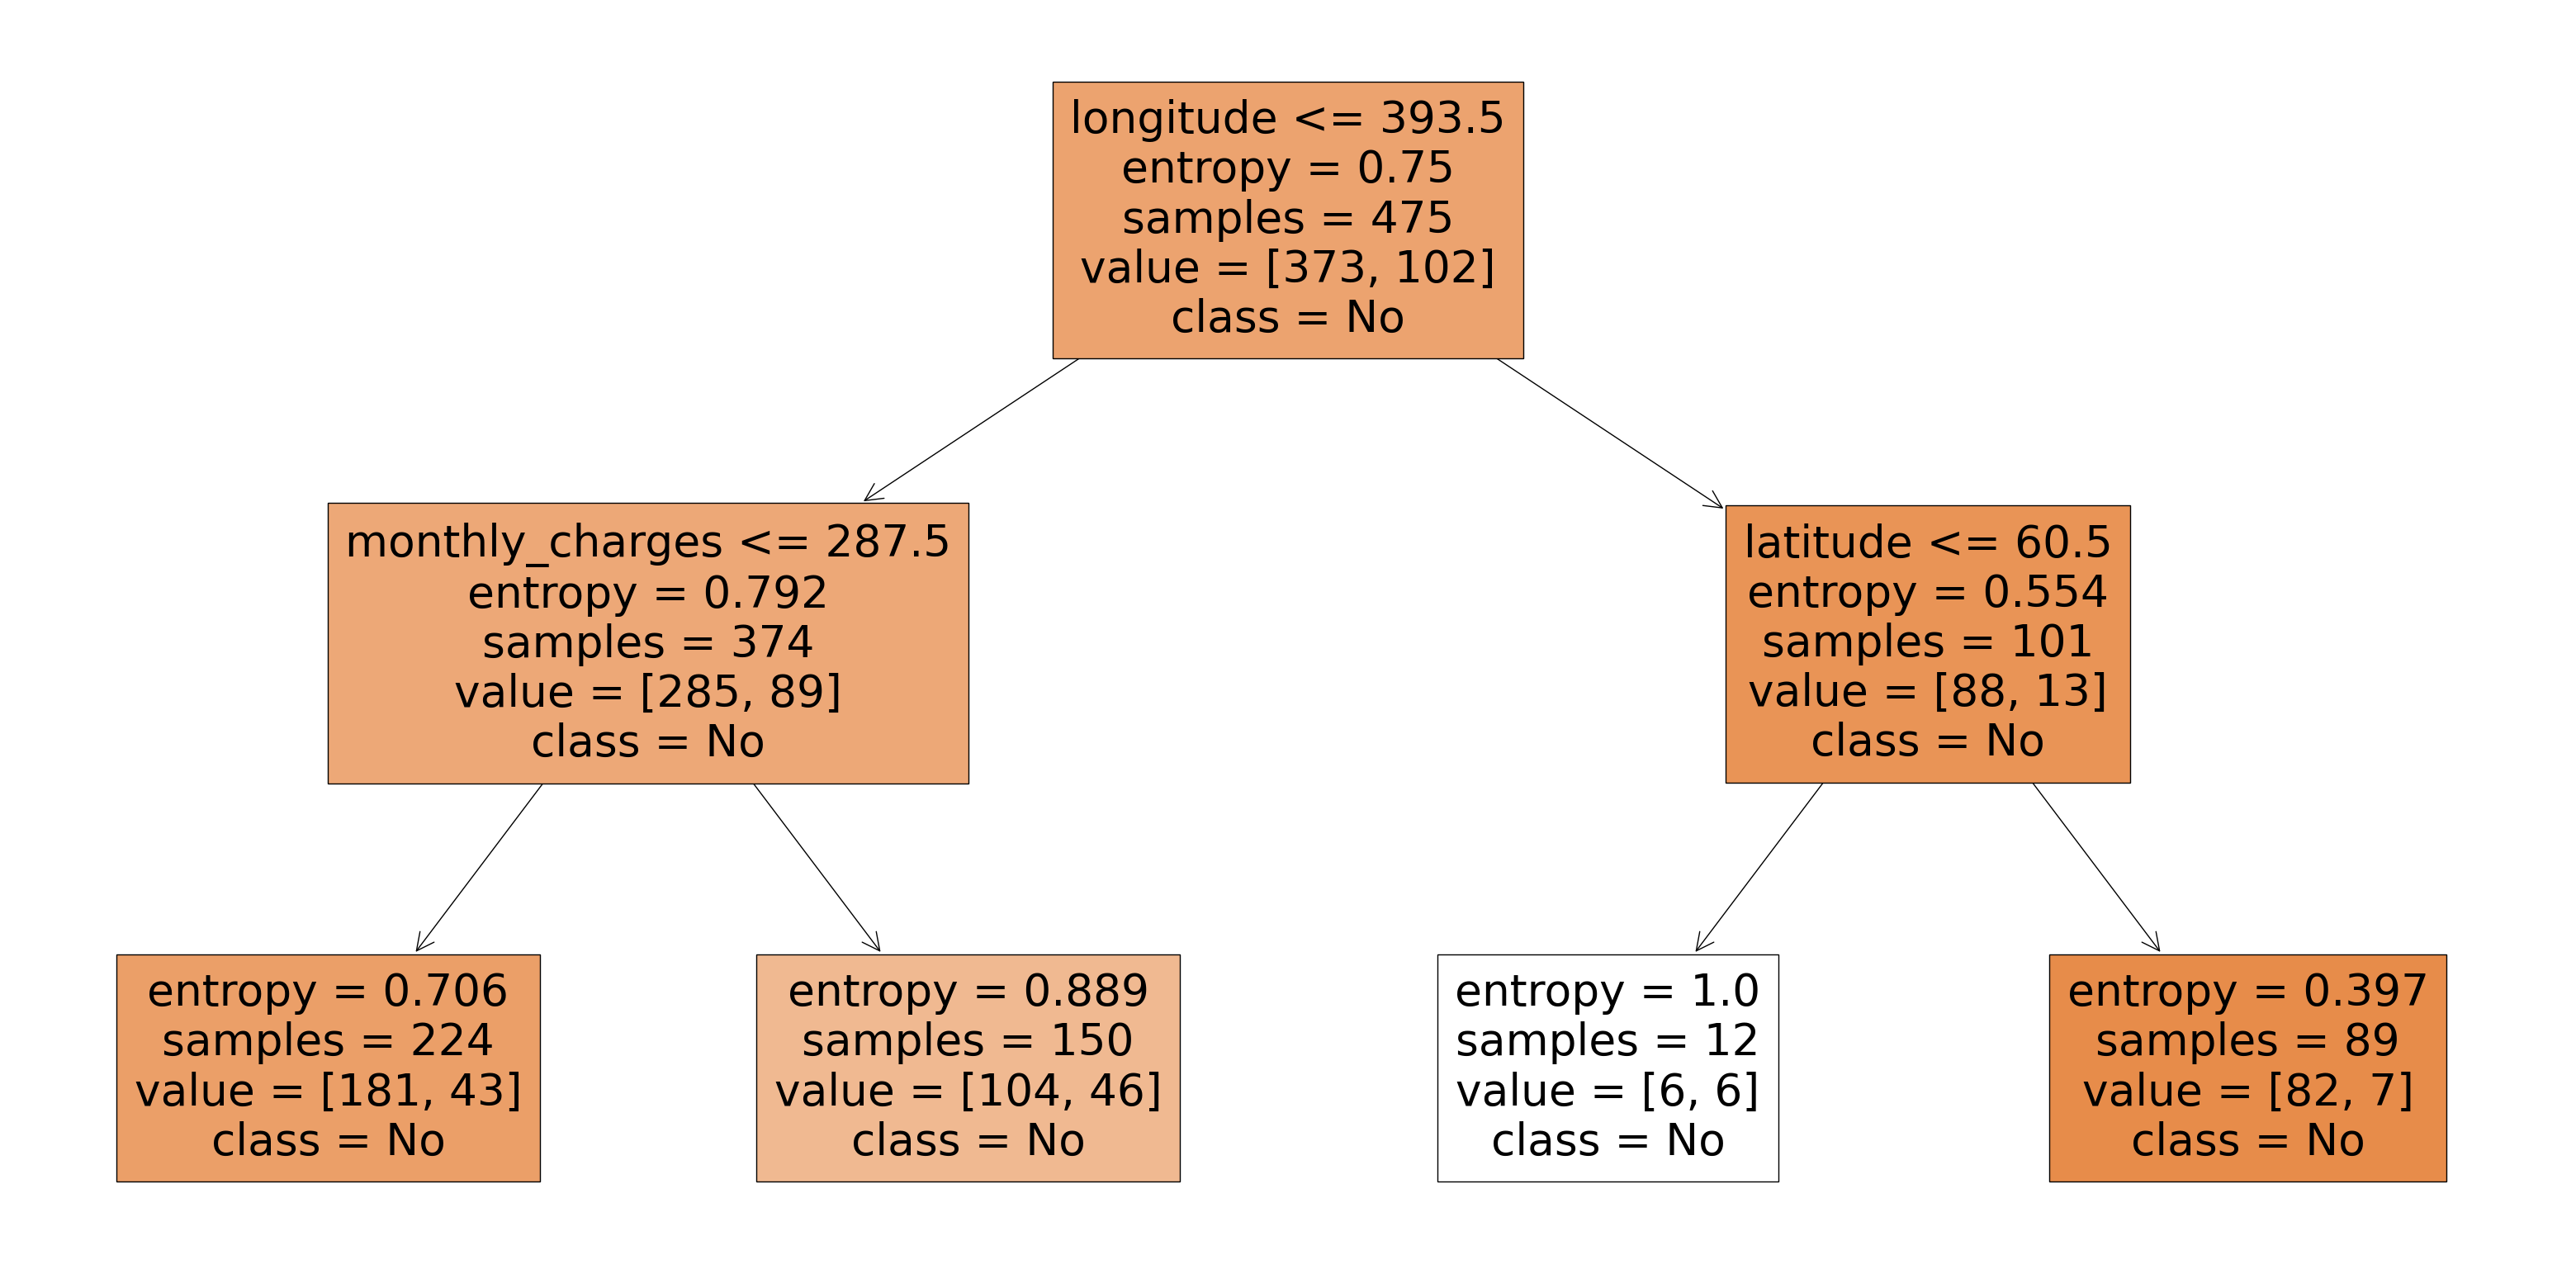

In [41]:
#decision tree for model 3 , where max_depth was 2

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(data3,class_names=['No','Yes'],feature_names= X_train.columns,filled=True)
plt.show()

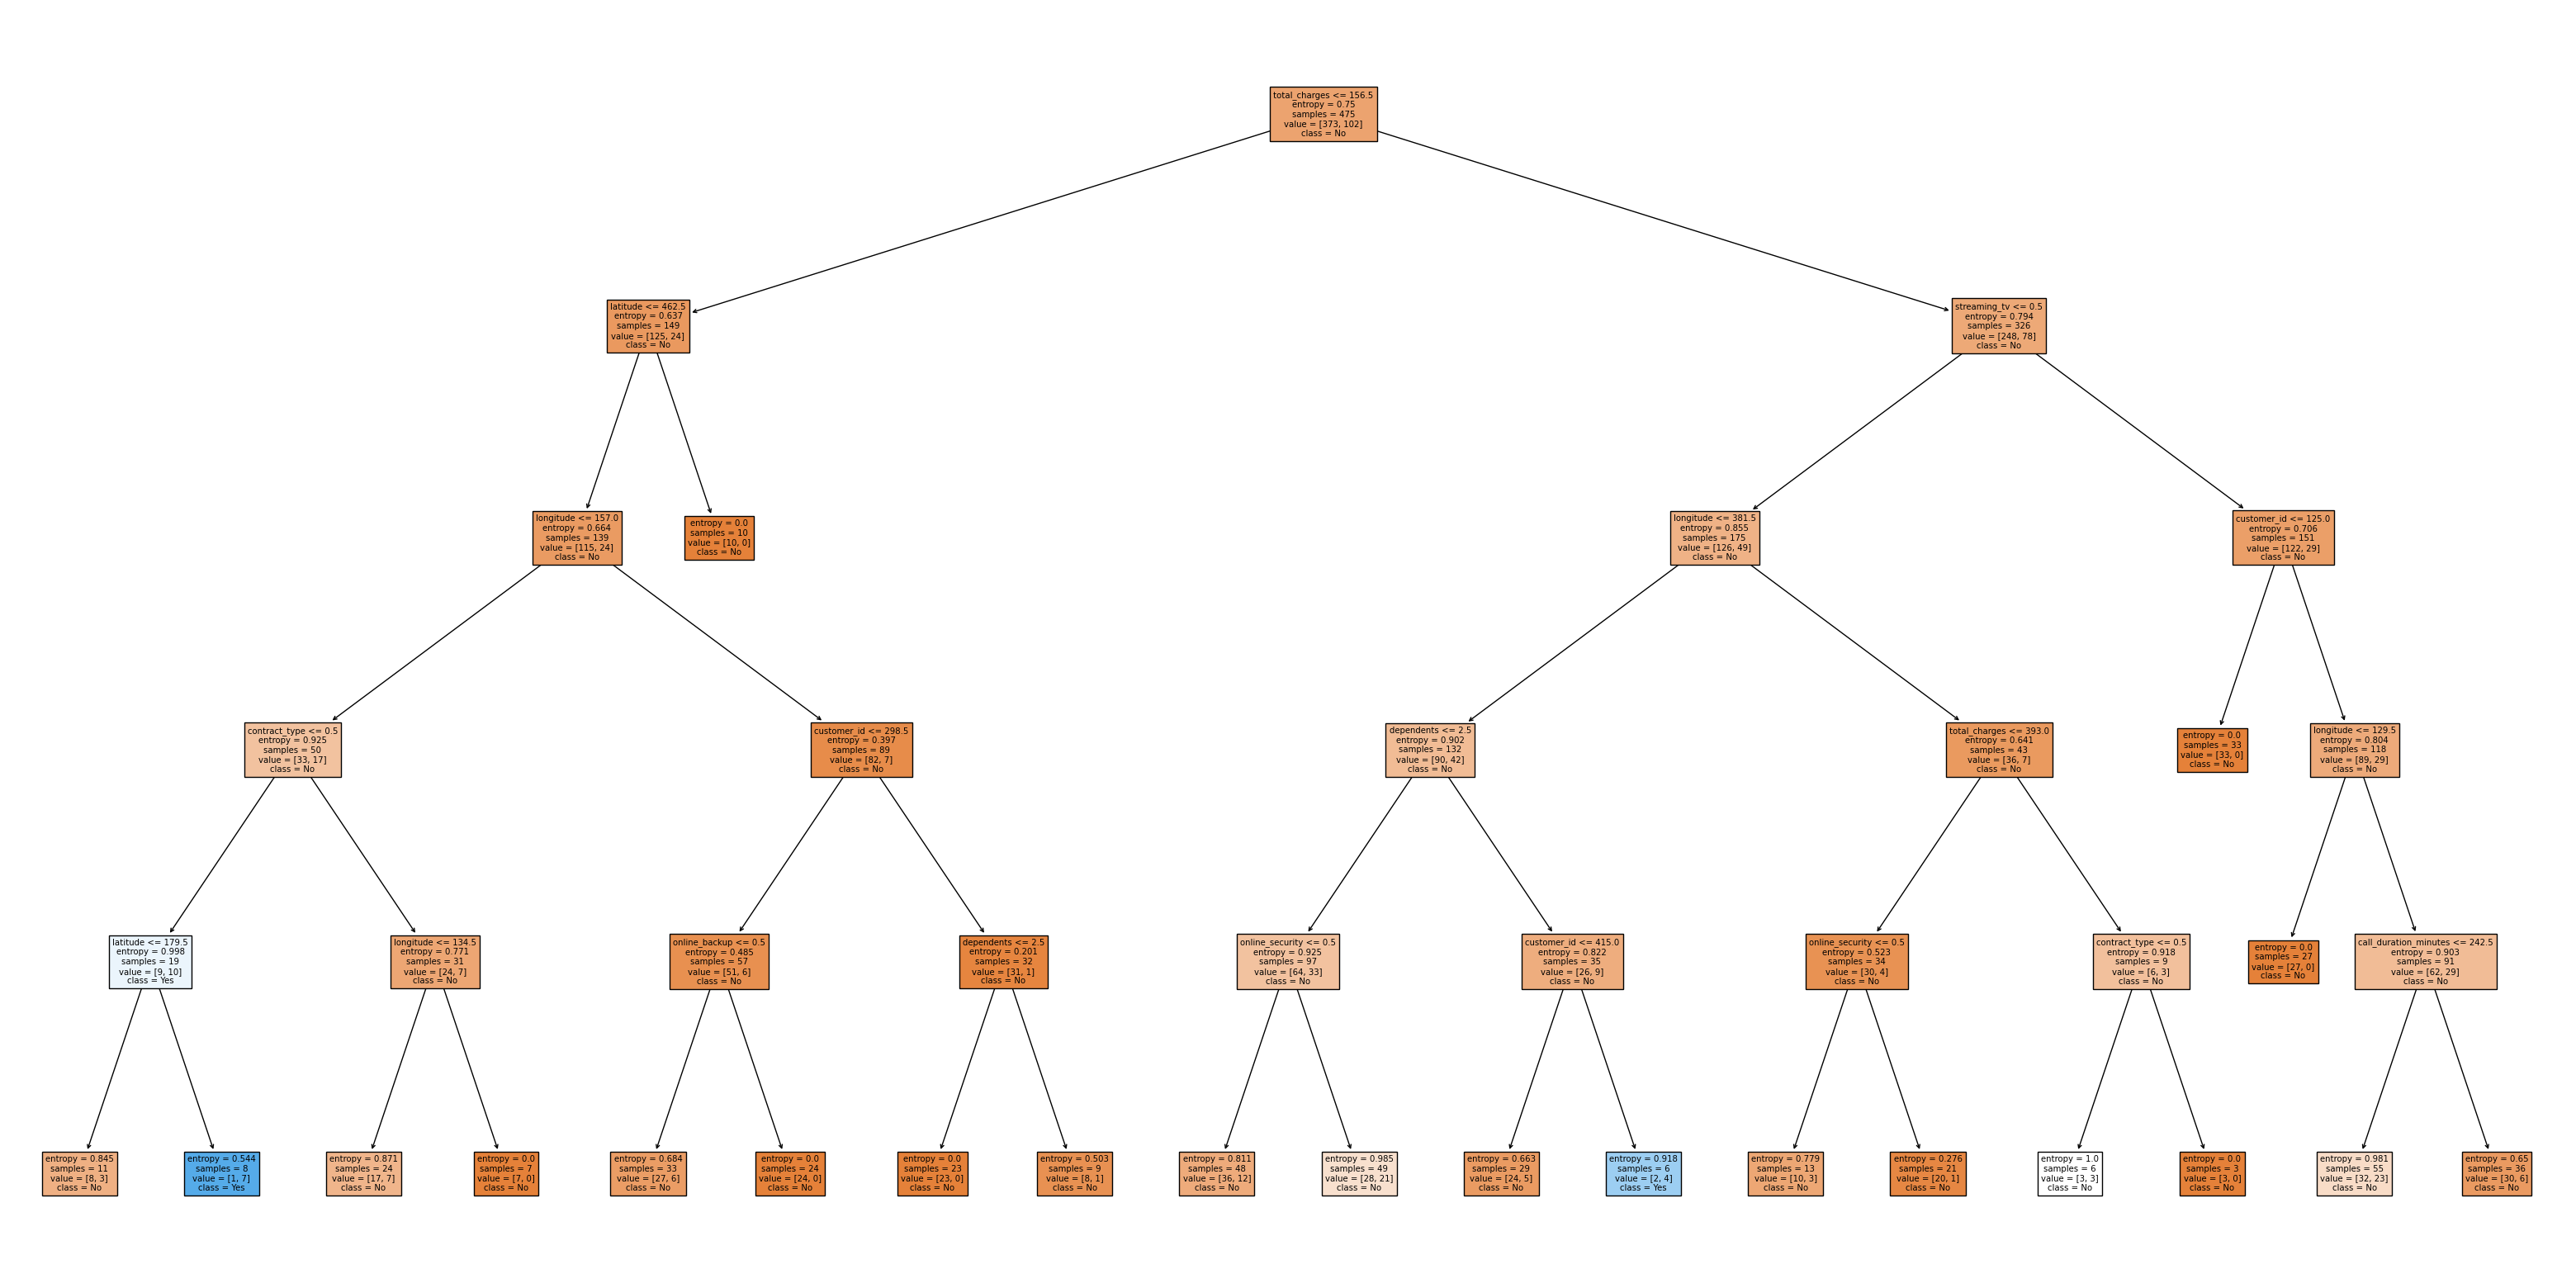

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(data4,class_names=['No','Yes'],feature_names=X_train.columns,filled=True)
plt.show()

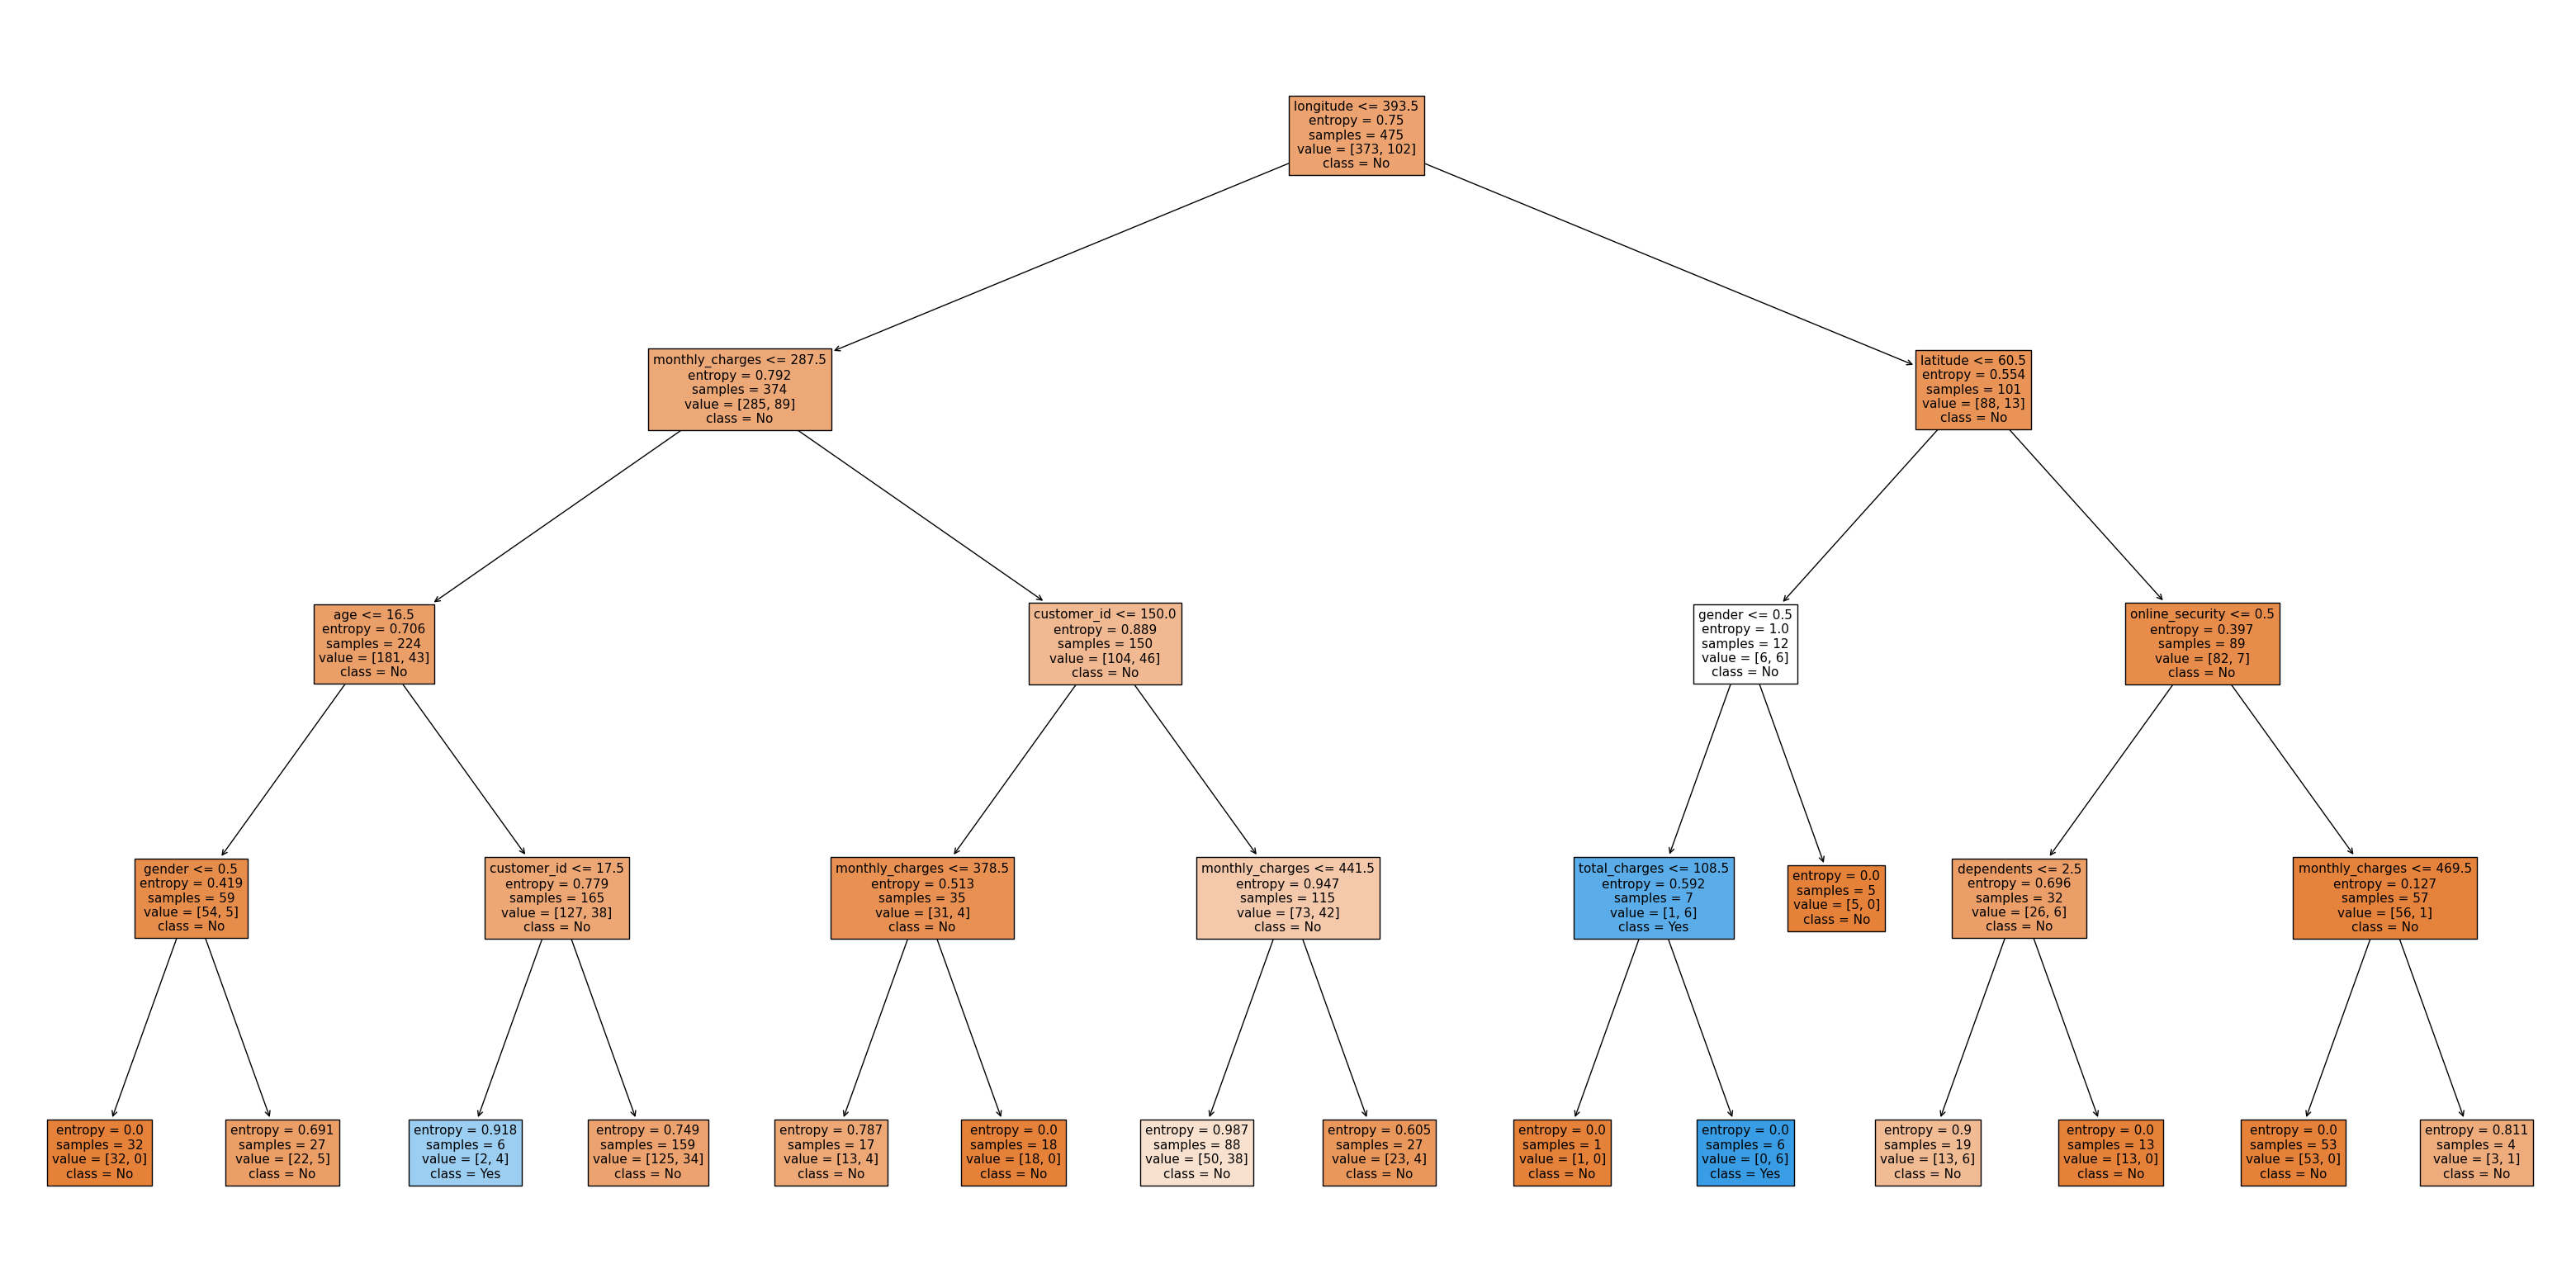

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(data2,class_names=['No','Yes'],feature_names=X_train.columns,filled=True)
plt.show()

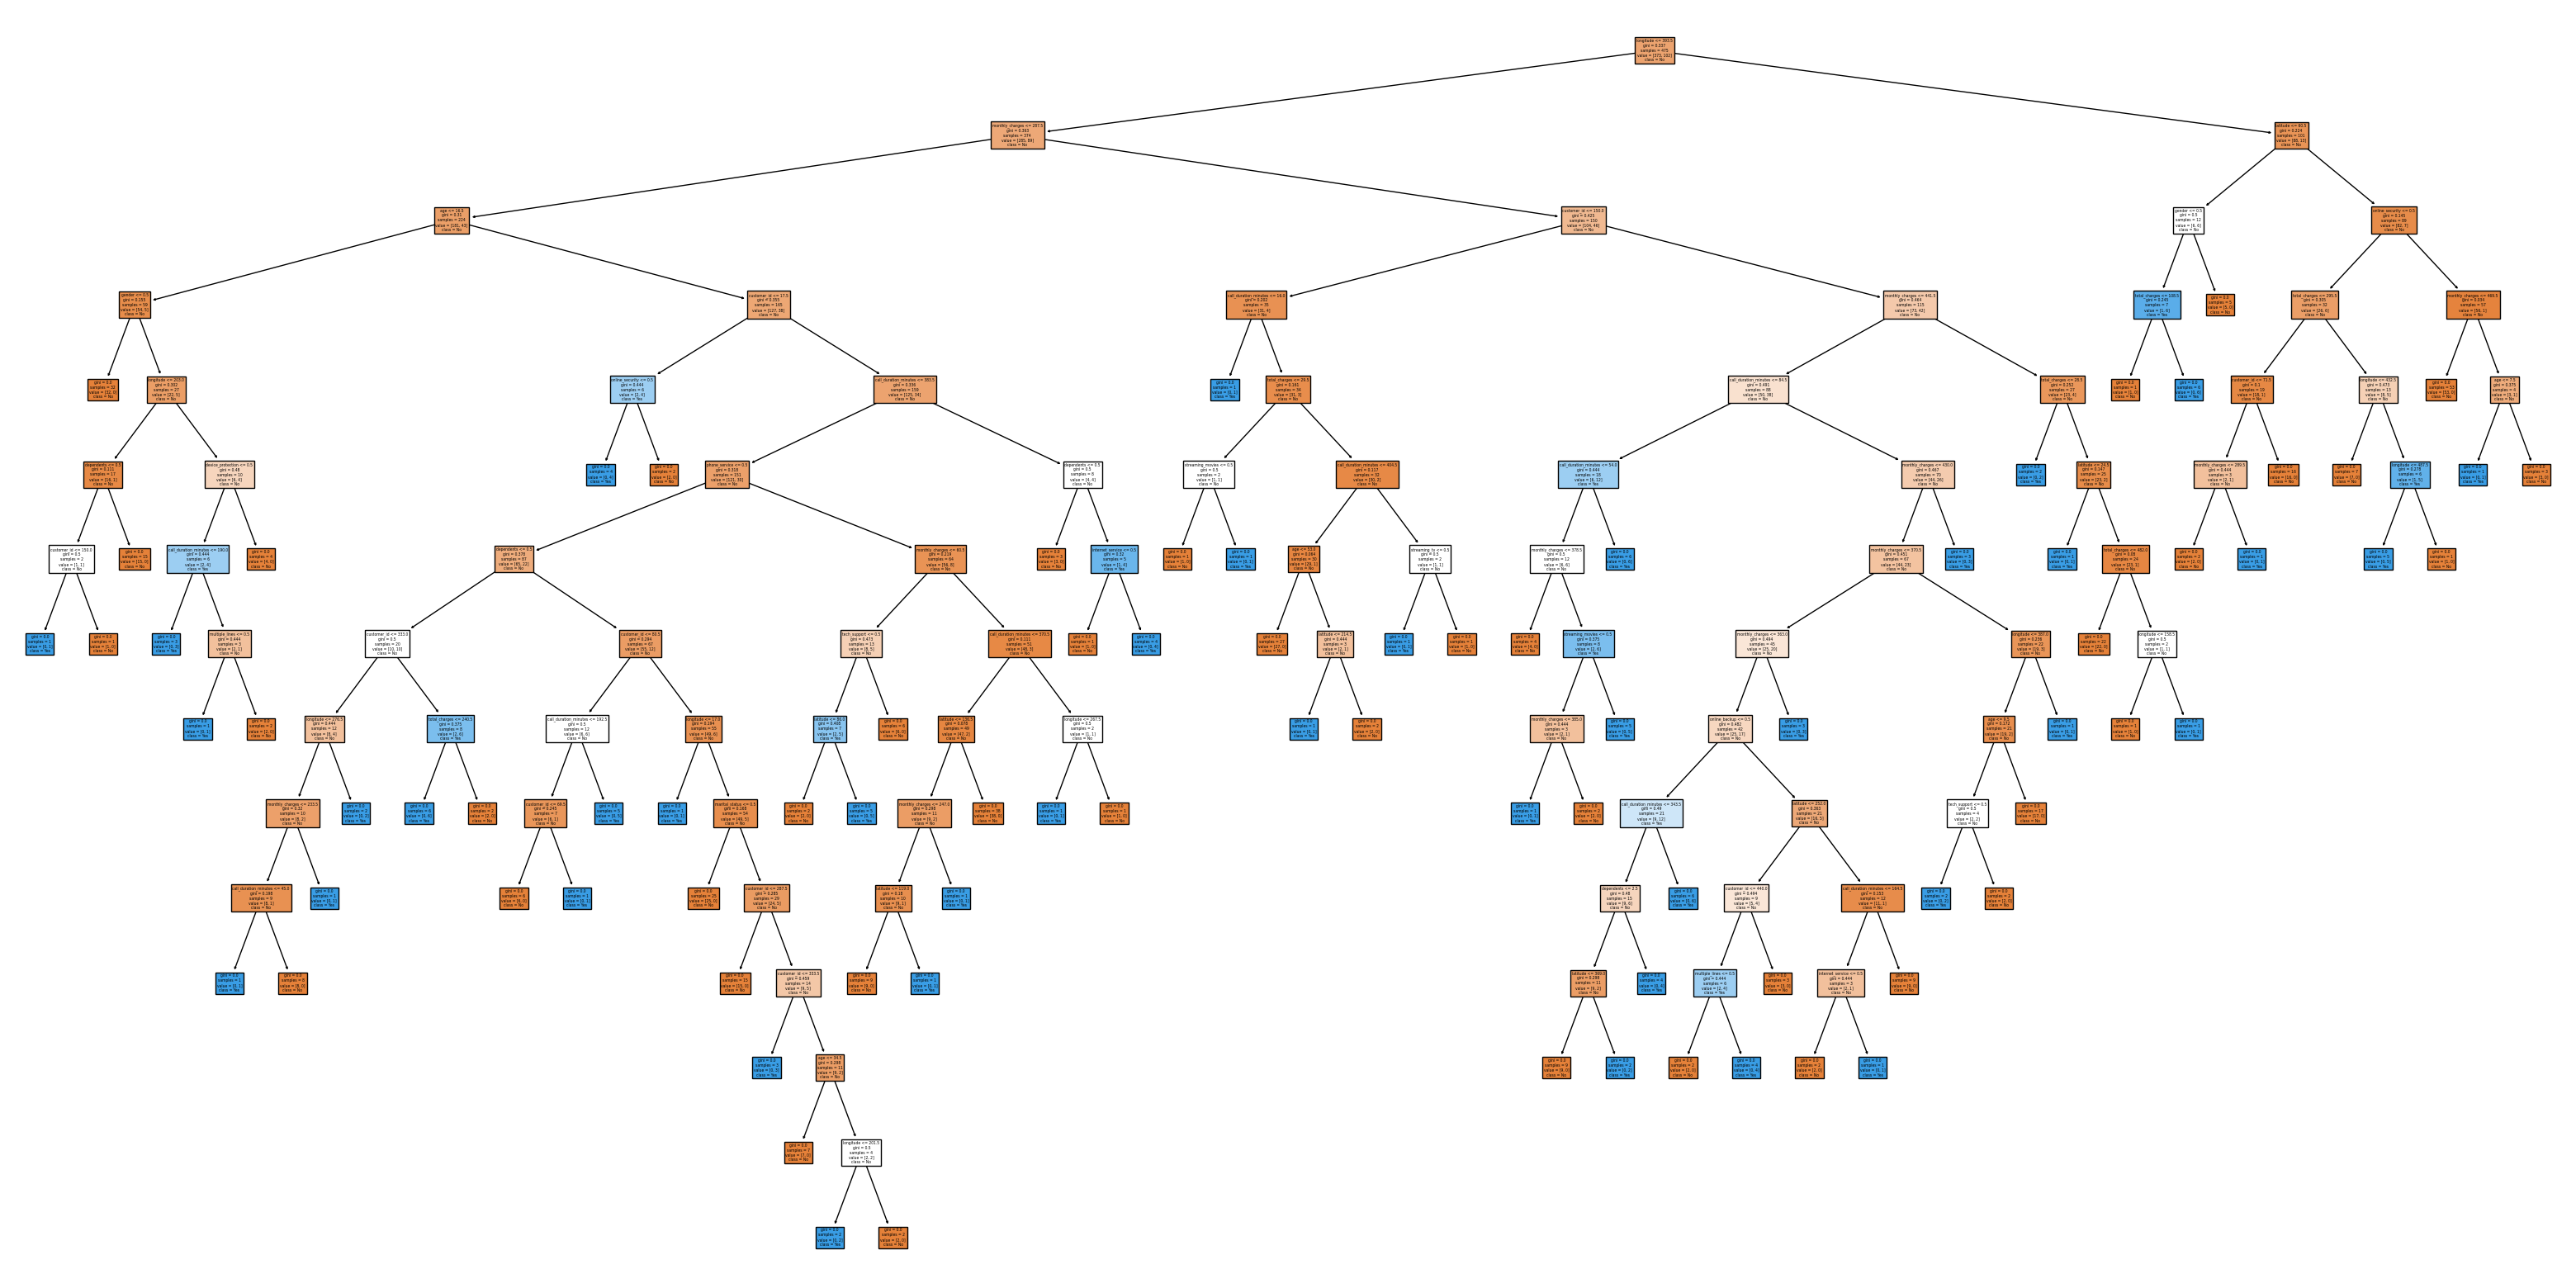

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(data1,class_names=['No','Yes'],feature_names=X_train.columns,filled=True)
plt.show()